In [419]:
import pandas as pd
import numpy as np

In [420]:
import requests
star_response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

In [421]:
from bs4 import BeautifulSoup
star_soup = BeautifulSoup(star_response.content, "html.parser")

In [422]:
star_table = star_soup.find_all("table")[0]
star_table

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Starbucks Stores 2023<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

In [423]:
row_1 = star_table.find_all("tr")[1]
state_tag = row_1.find("th")
state_tag.text

'California'

In [424]:
cells = row_1.find_all("td")

store_tag_2023 = cells[0].text
store_tag_2023

'3,080'

In [425]:
rows = []

# iterate over all rows in the faculty table
for row in star_table.find_all("tr")[1:]:

    # The information we need is the text between tags.
    cells = row.find_all("td")
    state_tag = row.find("th")
    state = state_tag.text

    store_2023 = cells[0].text
    store_2021 = cells[1].text
    store_2024 = cells[2].text

    # Append this data.
    rows.append({
        "State": state,
        "2021": store_2021,
        "2023": store_2023,
        "2024": store_2021
    })

In [426]:
bux_df = pd.DataFrame(rows)

In [427]:
bux_df = bux_df.melt(id_vars=["State"], var_name="Year", value_name="Stores")

In [428]:
bux_df["Chain"] = "Starbucks"

In [429]:
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")

In [430]:
dunkin_soup = BeautifulSoup(dunkin_response.content, "html.parser")

In [431]:
dunkin_table = dunkin_soup.find_all("table")[0]
dunkin_table

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Dunkin Locations 2024<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

In [472]:
dunkin_table.find_all("th")[3].text

'New York'

In [432]:
dunkin_rows = []

# iterate over all rows in the faculty table
for row in dunkin_table.find_all("tr")[1:]:

    # The information we need is the text between tags.
    cells = row.find_all("td")
    state_tag = row.find("th")
    state = state_tag.text

    store_2024 = cells[0].text
    store_2023 = cells[1].text

    # Append this data.
    dunkin_rows.append({
        "State": state,
        "2024": store_2024,
        "2023": store_2023
    })

In [433]:
dunkin_df = pd.DataFrame(dunkin_rows)

In [434]:
dunkin_df = dunkin_df.melt(id_vars=["State"], var_name="Year", value_name="Stores")

In [435]:
dunkin_df["Chain"] = "Dunkin Donuts"

In [436]:
coffee_df = pd.concat([dunkin_df, bux_df], ignore_index=True)

In [437]:
coffee_df.head()

,State,Year,Stores,Chain
0,New York,2024,"1,431",Dunkin Donuts
1,Massachusetts,2024,"1,042",Dunkin Donuts
2,Florida,2024,909,Dunkin Donuts
3,New Jersey,2024,872,Dunkin Donuts
4,Illinois,2024,711,Dunkin Donuts


In [438]:
pop_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")

In [439]:
pop_soup = BeautifulSoup(pop_response.content, "html.parser")

In [440]:
len(pop_soup.find_all("table"))

1

In [441]:
pop_table = pop_soup.find_all("table")[0]

In [442]:
pop_rows = []

# iterate over all rows in the faculty table
for row in pop_table.find_all("tr")[1:]:

    # Get all the cells (<td>) in the row.
    cells = row.find_all("td")

    # The information we need is the text between tags.

    state_tag = cells[2].find("strong") or cells[2]
    state = state_tag.get_text(strip=True)

    pop_tag = cells[3].find("strong") or cells[3]
    pop = pop_tag.get_text(strip=True)

    # Append this data.
    pop_rows.append({
        "State": state,
        "pop_2020": pop
    })

In [443]:
pop_df = pd.DataFrame(pop_rows)

In [444]:
coffee_df = pd.merge(coffee_df, pop_df, how="inner", on="State")

In [445]:
# Starbucks revenue figures found at companiesmarketcap.com 
# 2024 figure extrapolated from the revenue reported to date -> added 1/6 of the revenue to date for Nov and Dec

coffee_df.loc[(coffee_df["Chain"] == "Starbucks") & (coffee_df["Year"] == "2021"), "Revenue"] = 30360000000
coffee_df.loc[(coffee_df["Chain"] == "Starbucks") & (coffee_df["Year"] == "2023"), "Revenue"] = 36680000000
coffee_df.loc[(coffee_df["Chain"] == "Starbucks") & (coffee_df["Year"] == "2024"), "Revenue"] = 42550000000

In [446]:
# Dunkin' Donuts went private in 2019 - right before the pandemic
# Difficult to find statistics on it - revenue in 2019 was 1.31 billion. 
# Starbucks revenue in 2019 was 26.97B. Factoring in inflation we will put Dunkin' Donuts at 2.73B for 2023 and 2.96B for 2024.

coffee_df.loc[(coffee_df["Chain"] == "Dunkin Donuts") & (coffee_df["Year"] == "2023"), "Revenue"] = 2730000000
coffee_df.loc[(coffee_df["Chain"] == "Dunkin Donuts") & (coffee_df["Year"] == "2024"), "Revenue"] = 2960000000

In [447]:
state_to_region = {
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast",
    "New Hampshire": "Northeast", "Rhode Island": "Northeast", "Vermont": "Northeast",
    "New Jersey": "Northeast", "New York": "Northeast", "Pennsylvania": "Northeast",
    
    "Illinois": "Midwest", "Indiana": "Midwest", "Michigan": "Midwest", 
    "Ohio": "Midwest", "Wisconsin": "Midwest", "Iowa": "Midwest", 
    "Kansas": "Midwest", "Minnesota": "Midwest", "Missouri": "Midwest", 
    "Nebraska": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",
    
    "Delaware": "South", "Florida": "South", "Georgia": "South",
    "Maryland": "South", "North Carolina": "South", "South Carolina": "South",
    "Virginia": "South", "Washington, D.C.": "South", "West Virginia": "South",
    "Alabama": "South", "Kentucky": "South", "Mississippi": "South", 
    "Tennessee": "South", "Arkansas": "South", "Louisiana": "South", 
    "Oklahoma": "South", "Texas": "South",
    
    "Arizona": "West", "Colorado": "West", "Idaho": "West", 
    "Montana": "West", "Nevada": "West", "New Mexico": "West", 
    "Utah": "West", "Wyoming": "West", "Alaska": "West", 
    "California": "West", "Hawaii": "West", "Oregon": "West", 
    "Washington": "West"
}

coffee_df["Region"] = coffee_df["State"].map(state_to_region)

In [448]:
# Clean up data

coffee_df["Stores"] = coffee_df["Stores"].str.replace(",", "")
coffee_df["Stores"] = pd.to_numeric(coffee_df["Stores"])

In [449]:
coffee_df["pop_2020"] = coffee_df["pop_2020"].str.replace(",", "")
coffee_df["pop_2020"] = pd.to_numeric(coffee_df["pop_2020"])

In [450]:
# Are some of these chains more prevalent in certain states than others? Both frequency and sheer number
# Step 1 - ready the dataset. For this question we will focus on the year 2023.

df_2023 = coffee_df[coffee_df["Year"] == "2023"]
df_store_region = df_2023.groupby(["Region", "Chain"])["Stores"].sum().reset_index()

starbucks_sum = df_2023[df_2023["Chain"] == "Starbucks"]["Stores"].sum()
dunkin_sum = df_2023[df_2023["Chain"] == "Dunkin Donuts"]["Stores"].sum()

In [451]:
df_store_region.loc[(df_store_region["Chain"] == "Dunkin Donuts"), "Freq"] = df_store_region["Stores"] / dunkin_sum
df_store_region.loc[(df_store_region["Chain"] == "Starbucks"), "Freq"] = df_store_region["Stores"] / starbucks_sum

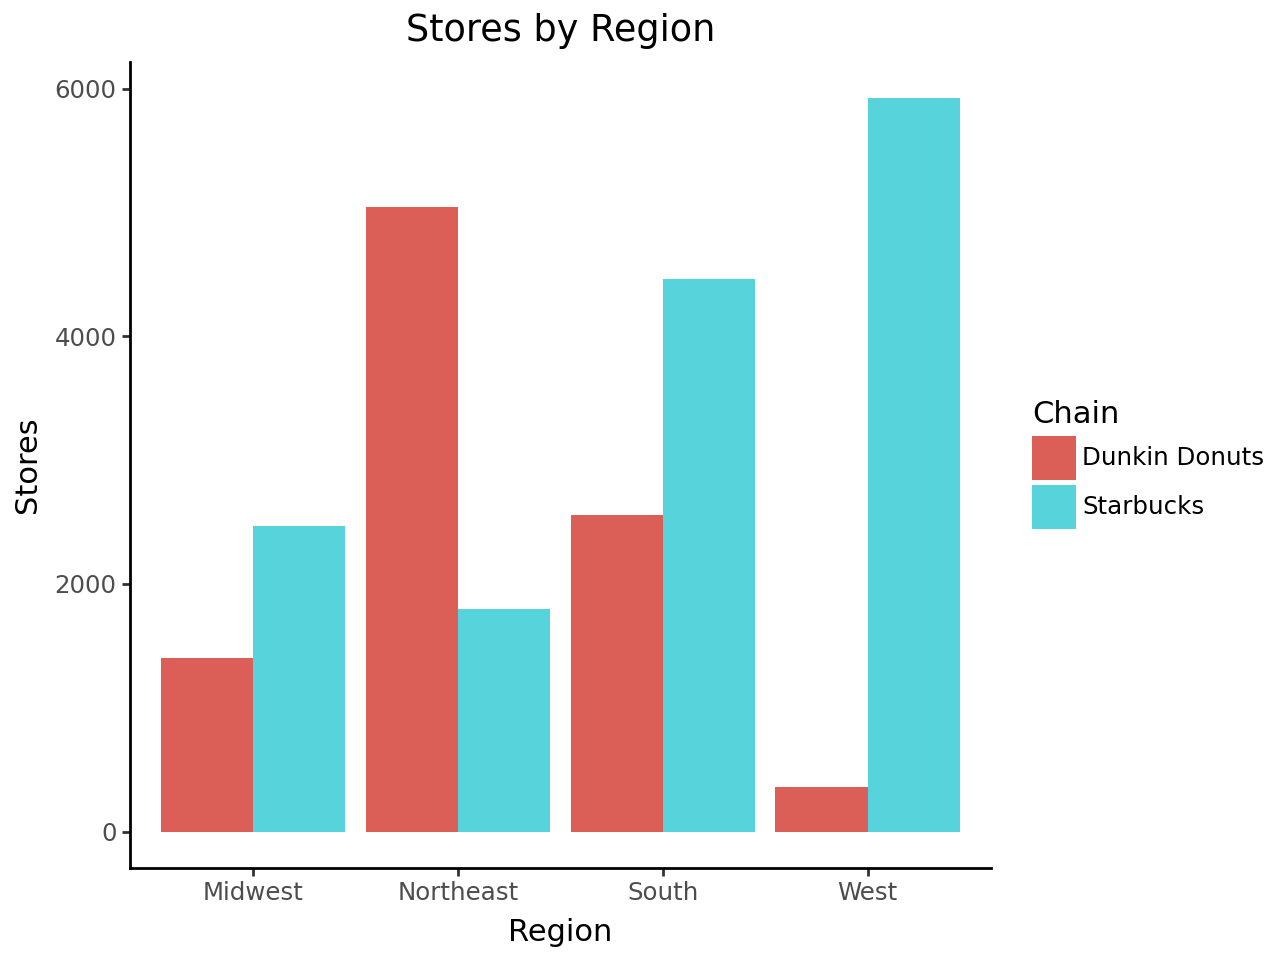

In [452]:
from plotnine import ggplot, aes, geom_col, theme_classic, labs

(ggplot(df_store_region, aes(x="Region", y="Stores", fill="Chain"))
+ geom_col(position="dodge")
+ theme_classic()
+ labs(title="Stores by Region"))

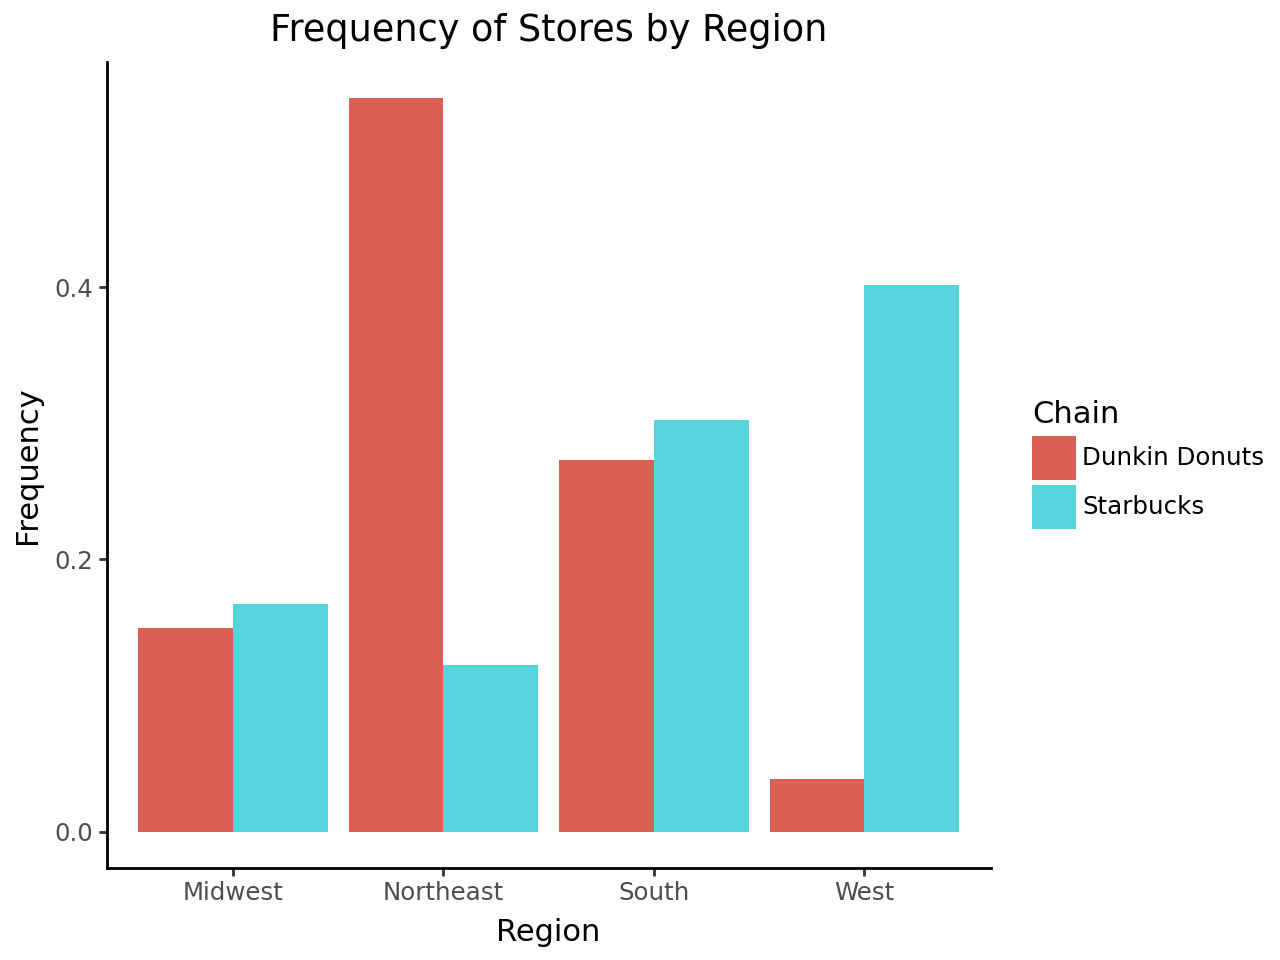

In [453]:
(ggplot(df_store_region, aes(x="Region", y="Freq", fill="Chain"))
+ geom_col(position="dodge")
+ theme_classic()
+ labs(title="Frequency of Stores by Region", y="Frequency"))

The two visualizations above depict the amount of Dunkin' Donuts stores and Starbucks stores by United States region. Predictably, Starbucks is much more popular on the west coast and Dunkin' is more popular in the northeast. This is probably due to the fact that Starbucks is headquartered in Seattle while Dunkin' is based out of Massachusetts. 

Just looking at sheer number, Starbucks has more stores in all regions by a vast number, but frequency puts these figures into perspective. Starbucks and Dunkin' Donuts have a very similar proportion of their total USA stores in both the midwest and the south. They tend to heavily specialize in their respective headquartered region.

In [454]:
# Does the distribution of each chain’s stores match population distribution by state?

df_state = df_2023.groupby(["State", "Chain"]).agg({
    "Stores": "sum",
    "pop_2020": "first",
    "Region": "first"
}).reset_index()

In [455]:
starbucks_sum = df_2023[df_2023["Chain"] == "Starbucks"]["Stores"].sum()
dunkin_sum = df_2023[df_2023["Chain"] == "Dunkin Donuts"]["Stores"].sum()

df_state.loc[(df_state["Chain"] == "Dunkin Donuts"), "Store_Freq"] = df_state["Stores"] / dunkin_sum
df_state.loc[(df_state["Chain"] == "Starbucks"), "Store_Freq"] = df_state["Stores"] / starbucks_sum

In [456]:
us_population = df_state.groupby("State")["pop_2020"].first().sum()
df_state["Pop_Freq"] = df_state["pop_2020"] / us_population

In [457]:
# keeping the top five states for a visualization. More than that would be overwhelming.

most_stores = df_state.groupby("State")["Stores"].sum().sort_values(ascending=False).head(n=5).reset_index()["State"].tolist()

df_top_5 = df_state[df_state["State"].isin(most_stores)]
df_top_5 = df_top_5[["State", "Chain", "Store_Freq", "Pop_Freq"]]

df_top_melt = df_top_5.melt(id_vars=["State", "Chain"], var_name="Frequency_Type", value_name="Freq")

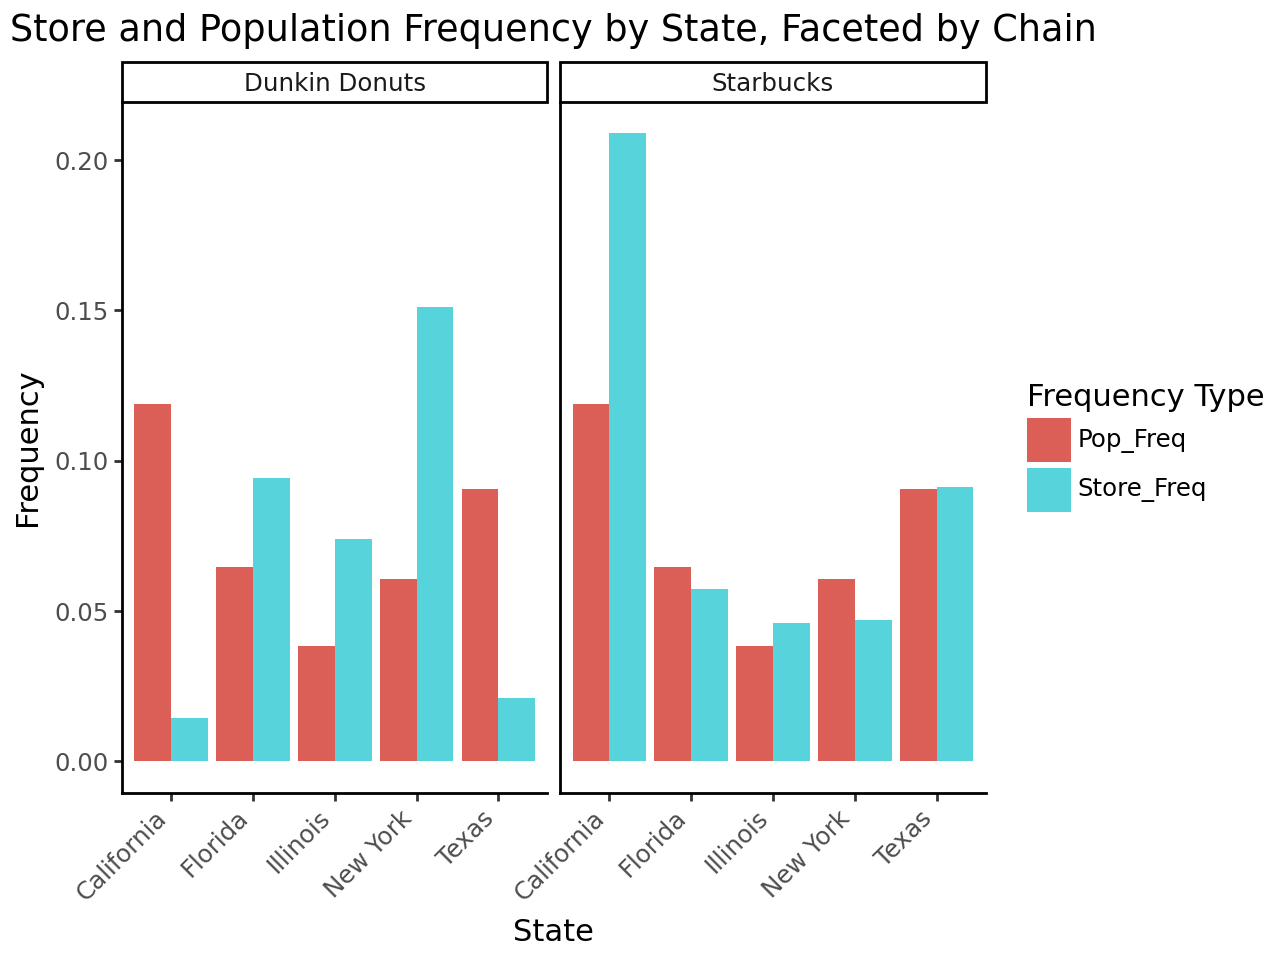

In [458]:
from plotnine import facet_wrap, theme, element_text

(ggplot(df_top_melt, aes(x="State", y="Freq", fill="Frequency_Type"))
+ geom_col(position="dodge")
+ facet_wrap("~Chain")
+ labs(title="Store and Population Frequency by State, Faceted by Chain",
        x="State",
        y="Frequency",
        fill="Frequency Type")
+ theme_classic()
+ theme(axis_text_x=element_text(angle=45, hjust=1)))

California's population percentage (as a whole of the United States) is much larger than the percentage of Dunkin' stores in California. The opposite effect happens with Starbucks. A very large percentage of Starbucks' stores are in California, even greater than its percentage of the population. Another state with a similar distribution is New York. In New York, the percentage of Dunkin' Donuts is much higher than the population percentage, but its percentage of Starbucks lines up with its population percentage.

In [459]:
# I want to do some sort of visualization about revenue. 
# My Dunkin' Donuts numbers are estimated as the company is private.
# This visualiation will track the revenue growth by company over time in comparison to its store growth
# I wish I had state-specific data on this because that would be incredibly interesting.

coffee_df["Revenue(M)"] = coffee_df["Revenue"] / 1000000
coffee_df["Year"] = pd.to_datetime(coffee_df["Year"], format="%Y")

df_rev_stores = coffee_df.groupby(["Year", "Chain"]).agg({
    "Stores": "sum",
    "Revenue(M)": "first"
}).reset_index().melt(id_vars=["Year", "Chain"], var_name="Metric_Type", value_name = "Metric")

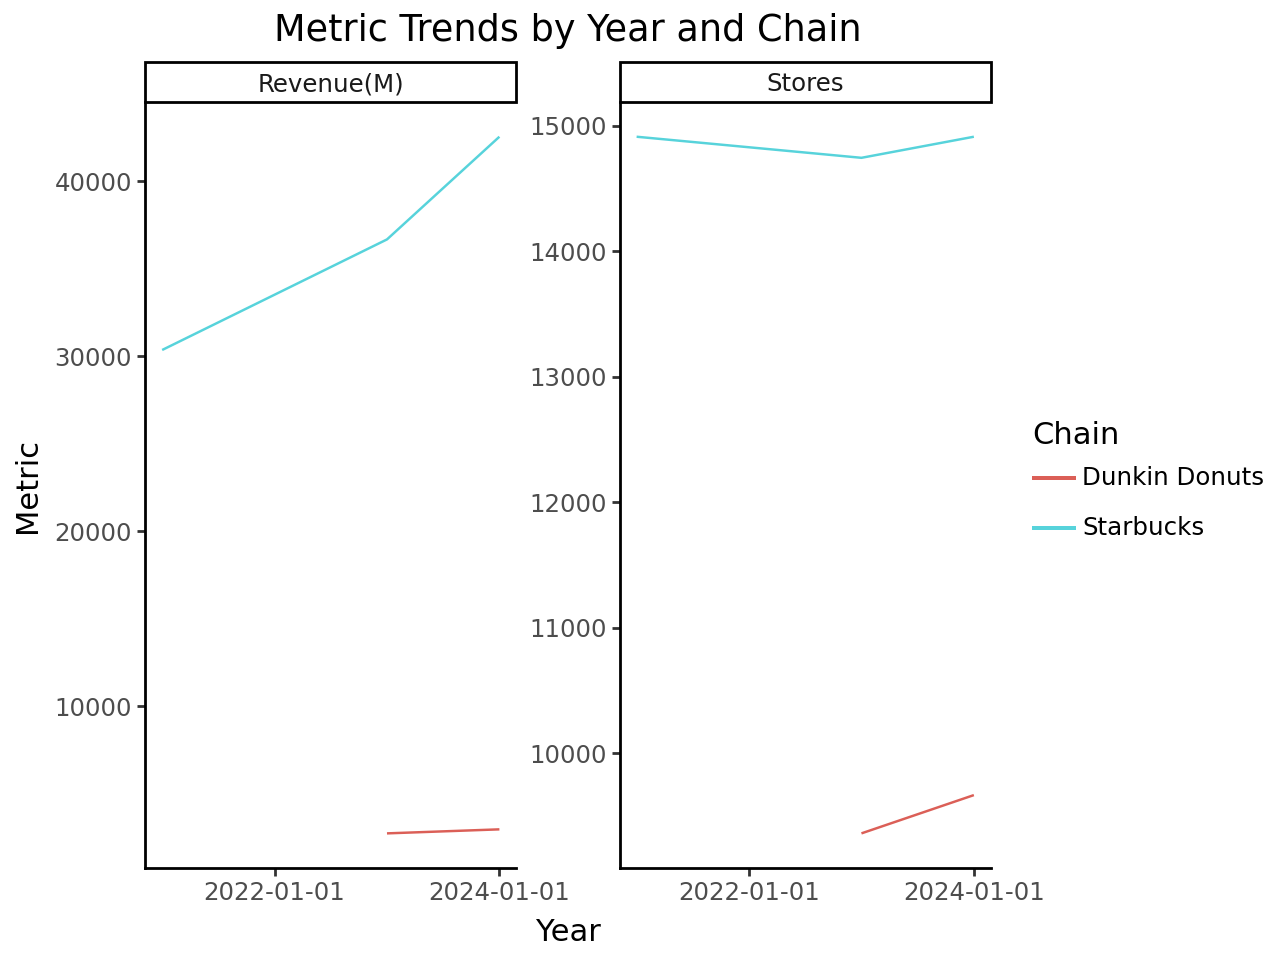

In [463]:
from plotnine import geom_line

(ggplot(df_rev_stores, aes(x="Year", y='Metric', color='Chain'))
 + geom_line()
 + facet_wrap('~Metric_Type', scales = "free_y")
 + labs(title="Metric Trends by Year and Chain",
        x="Year",
        y="Metric",
        color="Chain")
 + theme_classic())

We don't really learn a whole lot with this graph. We do see that the revenue for Starbucks (not an estimated metric) is increasing at a linear rate that we cannot expect the rate of stores to match. Interestingly, the total number of Starbucks stores secreased from 2021 to 2023, but rose again in 2024. This did not affect the company's revenue. Dunkin' has seen an significant increase in stores from 2023 to 2024 - we do not really know how this is actually affecting revenue.

In [493]:
def webscrape_company(url):
    """
    Returns DataFrame of webscraped table from a url of the form:
            https://worldpopulationreview.com/state-rankings/walmart-stores-by-state
    Parameters
    ----------
    url: str
        website url
    
    Return
    ------
    pandas DataFrame
        with columns for state and rows in tidy formatting
    """
    company_name = url.split("/")[-1].replace("-stores-by-state", "").replace("-", " ").title()

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find_all("table")[0]
    
    rows = []

    for row in table.find_all("tr")[1:]:

        state_tag = row.find("th")
        state = state_tag.text

        cells = row.find_all("td")

        for cell in cells:
            cell_value = cell.text

            rows.append({
                "State": state,
                f"{company_name}_Stores": cell_value
    })

    return pd.DataFrame(rows)

In [494]:
walmart_df = webscrape_company(url = "https://worldpopulationreview.com/state-rankings/walmart-stores-by-state")

In [495]:
walmart_df

,State,Walmart_Stores
0,Texas,517
1,Florida,341
2,California,280
3,North Carolina,192
4,Georgia,189
5,Illinois,161
6,Ohio,146
7,Missouri,137
8,Tennessee,137
9,Pennsylvania,134
